In [1]:
from __future__ import print_function, unicode_literals
import sys
import string
import re
import jieba
import jieba.posseg as pseg
from collections import Counter
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import lda
import lda.datasets

In [3]:
from gensim import corpora,models,similarities
import codecs

Using TensorFlow backend.


In [4]:
## 添加未登录词
jieba.add_word('硬脂酸镁')
jieba.add_word('贴敷剂')
jieba.add_word('详情')
jieba.add_word('请')
jieba.load_userdict("THUOCL_medical.txt") 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.594 seconds.
Prefix dict has been built succesfully.


In [5]:
## 创建停用词列表
punct = "、()《》。"  
def stopwordslist():
    stopwords = pd.read_csv('stoplist.txt',header=None,sep='timp',encoding='utf8',engine='python')
    des1=string.punctuation
    des1=des1 + punct
    stopwords.append(list(des1))  ## 添加可能出现的标点
    return stopwords

## 对句子进行分词
def seg_depart(sentence):
    cut = jieba.lcut(sentence.strip())
    stop_list = list(stopwordslist()[0])
    cutlist = []
    for i in cut:
        if i not in stop_list:
            cutlist.append(i)
    return cutlist  

In [6]:
## 药品名提取函数
def DRUG_NAME_EXTRACT(root):
    file_names = os.listdir(root)
    file_ob_list = []
    for file_name in file_names:
        fileob = root + '\\' + file_name
        file_ob_list.append(fileob)
    drugname = map(lambda x: re.findall(r"\\.*\\(.*).csv",x), file_ob_list)
    drugkeys = []
    for i in drugname:
        drugkeys.extend(i)
    return([file_ob_list,drugkeys])

In [24]:
## 输入信息
root = '.\百度词条爬虫\保健食品\保健品'
root = '.\百度词条爬虫\消化系统及代谢药\刺激食欲药'

#.\百度词条爬虫\血液和造血系统药物\抗贫血制剂
root2 = '.\dxy_copy\保健品'
categ = '保健品'
drgnm = '复方丁香开胃贴'
feat = '注意事项'  #百科
feat2 = '注意事项'  #丁香园

In [25]:
## 读取百度词条数据
import os
import csv
import linecache ## 读取指定行函数linecache.getline(file_ob, line_num)所在包
from pandas.core.frame import DataFrame

file_ob_list, drugkeys = DRUG_NAME_EXTRACT(root)
createDF = locals()

for i in range(len(file_ob_list[1:])):
    with open(file_ob_list[1:][i], encoding='UTF-8') as csvfile:
        rows = csv.reader(csvfile)
        name = []
        feature = []
        for row in rows:
            name.append(row[0])
            feature.append(row[1])
        createDF["bk_df_" + str(i)] = pd.DataFrame(feature, index = name, columns = [drugkeys[i]]).drop(name[0])  
        createDF["bk_cut_all_" + str(i)] = pd.DataFrame(createDF["bk_df_" + str(i)][drugkeys[i]].apply(lambda s: seg_depart(s)))
        ## 已分词数据框
dlist = []
for i in range(len(file_ob_list[1:])):
    dlist.append(createDF['bk_df_'+ str(i)])
#createDF['DF_'+'保健品'] = pd.concat(dlist, axis = 1, keys = drugkeys, join_axes = var)
createDF['BAIKE_DF_'+categ] = pd.concat(dlist, axis = 1)
createDF['BAIKE_DF_'+categ]

dlist2 = []
for i in range(len(file_ob_list[1:])):
    dlist2.append(createDF['bk_cut_all_'+ str(i)])
#createDF['DF_'+'保健品'] = pd.concat(dlist, axis = 1, keys = drugkeys, join_axes = var)
createDF['BAIKE_CUT_ALL_'+ categ] = pd.concat(dlist2, axis = 1)
createDF['BAIKE_DF_'+categ]

,他克莫司胶囊,塞来昔布胶囊,盐酸罗哌卡因注射液,盐酸雷尼替丁胶囊,盐酸雷莫司琼口内崩解片,盐酸雷莫司琼注射液,非布司他片
,他克莫司胶囊，适应症为预防肝脏或肾脏移植术后的移植物排斥反应。治疗肝脏或肾脏移植术后应用其他...,塞来昔布胶囊，用于缓解骨关节炎的症状和体征、缓解成人类风湿关节炎的症状和体征、治疗成人急性疼...,盐酸罗哌卡因注射液，适用于外科手术麻醉——硬膜外麻醉。,盐酸雷尼替丁胶囊，适应症为用于缓解胃酸过多所致的胃痛、胃灼热感（烧心）、反酸。,NaN,盐酸雷莫司琼注射液，适应症为预防和治疗抗恶性肿瘤治疗所引起的恶心、呕吐等消化道症状。,非布司他片，适用于痛风患者高尿酸血症的长期治疗。
不良反应,由于患者的基础疾病和同时服用多种药物，与免疫抑制药物相关的不良反应通常很难确立。 下述药物...,在临床对照研究中，已有大约4250 例骨关节炎(OA)患者，2100 例类风湿关节炎(RA)...,临床试验中报告的大量症状多为神经阻滞本身和临床中的生理反应。神经阻滞本身的生理反应在各种局麻...,1．常见的有：恶心、皮疹、便秘、乏力、头痛、头晕等。 2．对肾功能、性腺功能和中枢神经的不...,NaN,在上市前进行临床试验时的352例中有18例(5.1%)及在上市后使用结果调查及上市后临床试验...,以下信息为国外文献报道：1. 临床试验经验由于临床试验是在广泛多样的条件下进行的，所以在临床...
临床试验,NaN,骨关节炎： 本品与安慰剂相比能显著减轻关节疼痛。在几项为期最长达12 周、安慰剂和阳性药物...,NaN,NaN,NaN,NaN,NaN
作用类别,NaN,NaN,NaN,本品为抗酸类非处方药药品。,NaN,NaN,NaN
儿童用药,对儿童患者，通常需用成人推荐剂量的1.5～2倍才能达到与成人相同的血药浓度(肝功能、肾功能受...,目前尚无关于18 岁以下儿童应用塞来昔布的疗效和安全性的资料。,本品目前尚无研究资料，不应用于12岁以下的儿童。,NaN,对儿童给药尚无使用经验，其安全性还没有确立。,尚不明确。,尚未确定本品治疗18岁以下患者的安全性和有效性。
包装,铝塑包装 0.5mg：50粒/盒 1mg、5mg：50粒/盒；100粒/盒,铝塑包装，2 粒/盒；6 粒/盒；10 粒/盒。,塑料安瓿瓶装，5支/盒。,口服固体药用高密度聚乙烯瓶装，30粒/瓶。,（1）片/盒；（2）5片/盒；铝塑水泡眼包装。,棕色安瓿装，1支/盒。,铝塑泡罩包装，外加复合袋。40mg规格：12片/板×1板/袋/盒，12片/板×2板/袋/盒，...
孕妇及哺乳期妇女用药,临床数据表明他克莫司能透过胎盘。来自接受器官移植的妊娠患者的有限数据表明，本品与其他免疫抑制...,致畸作用： 妊娠期分级C 级。在口服剂量150mg/kg/day 时（按AUC0-24计，...,妊娠 除了产科使用本品进行硬膜外麻醉以外，尚缺乏在孕妇中使用的足够数据。动物实验并显示出本...,NaN,1．关于妊娠期给药的安全性尚未确立。2．对哺乳期妇女用药时应停止哺乳。,1．对妊娠过程中用药的安个性尚未确立。对孕妇或可能怀孕的妇女，只有在判断治疗方面的有益性大于...,孕妇FDA妊娠安全分类为C类：在孕妇中未进行充分的对照研究。所以唯有确认潜在益处大于对胎儿风...
性状,0.5mg：浅黄色硬质胶囊，内容物为白色粉末。 1mg：白色硬质胶囊，内容物为白色粉末。 ...,本品为胶囊剂，内容物为白色粉末。,本品为无色的澄明液体。 盐酸罗哌卡因注射液是一种无菌等渗水溶液。该溶液的pH值是由NaOH...,本品为胶囊剂。,本品为顶部扁平的半球状片剂，球面为淡红黄色，平面为暗红黄色。,本品为无色澄明液体。,NaN
成份,本品主要成份为他克莫司，化学名称为：[3S-[3R[E(1S，3S，4S)]， 4S，5R，...,本品主要成份及其化学名称为：塞来昔布，4-[5-(4-甲苯基)-3-(三氟甲基)-1 氢-1...,本品主要成份为盐酸罗哌卡因。 本品主要成份盐甲盐酸罗哌卡因化学名称：(S)-（-）-1-丙...,本品每粒含盐酸雷尼替丁(以雷尼替丁计)0.15克。辅料为：淀粉。,NaN,本品主要成份及其化学名称为：盐酸雷莫司琼 (—)-(R)-5-[(1-methyl-1H-...,NaN
执行标准,,,,,NaN,,YBH00432013


In [26]:
createDF['BAIKE_CUT_ALL_'+ categ]

,他克莫司胶囊,塞来昔布胶囊,盐酸罗哌卡因注射液,盐酸雷尼替丁胶囊,盐酸雷莫司琼口内崩解片,盐酸雷莫司琼注射液,非布司他片
,"[他克莫司, 胶囊, 适应症, 预防, 肝脏, 肾脏, 移植术, 后, 移植物, 排斥, 反...","[塞来, 昔布, 胶囊, 用于, 缓解, 骨关节炎, 症状, 体征, 缓解, 成人, 类风湿...","[盐酸, 罗, 哌, 卡因, 注射液, 适用, 外科手术, 麻醉, 硬膜外, 麻醉]","[盐酸, 雷尼替丁, 胶囊, 适应症, 用于, 缓解, 胃酸过多, 所致, 胃痛, 胃灼热,...",NaN,"[盐酸, 雷莫司, 琼, 注射液, 适应症, 预防, 治疗, 抗, 恶性肿瘤, 治疗, 引起...","[非布司, 他片, 适用, 痛风, 患者, 高尿酸, 血症, 长期, 治疗]"
不良反应,"[患者, 基础, 疾病, 服用, 多种, 药物, 免疫抑制, 药物, 相关, 不良反应, 通...","[临床, 对照, 研究, 中, 已有, 4250, , 例, 骨关节炎, OA, 患者, ...","[临床试验, 中, 报告, 大量, 症状, 多为, 神经, 阻滞, 临床, 中, 生理反应,...","[．, 常见, 恶心, 皮疹, 便秘, 乏力, 头痛, 头晕, , , ．, 肾功能, ...",NaN,"[上市, 前, 进行, 临床试验, 时, 352, 例中, 18, 例, 5.1%, 上市,...","[以下, 信息, 国外, 文献, 报道, , 临床试验, 经验, 临床试验, 广泛, 多样..."
临床试验,NaN,"[骨关节炎, , , 本品, 安慰剂, 相比, 显著, 减轻, 关节, 疼痛, 几项, ...",NaN,NaN,NaN,NaN,NaN
作用类别,NaN,NaN,NaN,"[本品, 抗酸, 类, 非处方药, 药品]",NaN,NaN,NaN
儿童用药,"[儿童, 患者, 通常, 需用, 成人, 推荐, 剂量, 1.5, 倍, 达到, 成人, 相...","[目前, 尚无, 18, , 岁, 以下, 儿童, 应用, 塞来, 昔布, 疗效, 安全性...","[本品, 目前, 尚无, 研究, 资料, 应用, 12, 岁, 以下, 儿童]",NaN,"[儿童, 药, 尚无, 使用, 经验, 安全性, 确立]","[尚, 明确]","[尚未, 确定, 本品, 治疗, 18, 岁, 以下, 患者, 安全性, 有效性]"
包装,"[铝塑, 包装, , 0.5, mg, 50, 粒, 盒, , 1mg, 5mg, 50...","[铝塑, 包装, , 粒, 盒, , 粒, 盒, 10, , 粒, 盒]","[塑料, 安瓿瓶, 装, 支, 盒]","[口服, 固体, 药用, 高密度, 聚乙烯, 瓶装, 30, 粒, 瓶]","[片, 盒, 片, 盒, 铝塑, 水泡, 眼, 包装]","[棕色, 安, 瓿, 装, 支, 盒]","[铝塑, 泡罩, 包装, 外加, 复合袋, 40mg, 规格, 12, 片, 板, ×, 板..."
孕妇及哺乳期妇女用药,"[临床, 数据, 表明, 他克莫司, 透过, 胎盘, 来自, 接受, 器官移植, 妊娠, 患...","[致畸, 作用, , , 妊娠期, 分级, C, , 级, 口服, 剂量, 150mg...","[妊娠, , , 产科, 使用, 本品, 进行, 硬膜外, 麻醉, 以外, 尚, 缺乏,...",NaN,"[．, 妊娠期, 药, 安全性, 尚未, 确立, ．, 哺乳期, 妇女, 用药, 时应, 停...","[．, 妊娠, 过程, 中, 用药, 安, 个性, 尚未, 确立, 孕妇, 怀孕, 妇女, ...","[孕妇, FDA, 妊娠, 安全, 分类, C, 类, 孕妇, 中未, 进行, 对照, 研究..."
性状,"[0.5, mg, 浅黄色, 硬质, 胶囊, 内容, 物为, 白色, 粉末, , , 1...","[本品, 胶囊剂, 内容, 物为, 白色, 粉末]","[本品, 无色, 澄明, 液体, , , 盐酸, 罗, 哌, 卡因, 注射液, 一种, ...","[本品, 胶囊剂]","[本品, 顶部, 扁平, 半球状, 片剂, 球面, 淡红, 黄色, 平面, 暗红, 黄色]","[本品, 无色, 澄明, 液体]",NaN
成份,"[本品, 主要, 成份, 他克莫司, 化学, 名称, 3S, 3R, E, 1S, 3S, ...","[本品, 主要, 成份, 化学, 名称, 塞来, 昔布, 甲苯, 基, 氟, 甲基, , ...","[本品, 主要, 成份, 盐酸, 罗, 哌, 卡因, , , 本品, 主要, 成份, 盐...","[本品, 每粒, 含, 盐酸, 雷尼替丁, 雷尼替丁, 计, 0.15, 克, 辅料, 淀粉]",NaN,"[本品, 主要, 成份, 化学, 名称, 盐酸, 雷莫司, 琼, , , R, meth...",NaN
执行标准,[],[],[],[],NaN,[],[YBH00432013]


In [10]:
## 读取丁香园数据
file_names2 = os.listdir(root2)
file_ob_list2 = []
for file_name in file_names2:
    fileob = root2 + '\\' + file_name
    file_ob_list2.append(fileob)
drugname = map(lambda x: re.findall(r"\\.*\\(.*).txt",x), file_ob_list2)
drugkeys = []
for i in drugname:
    drugkeys.extend(i)
#print(file_ob_list2)
#print('\n')
#print(drugkeys)

In [11]:
import re
createDF = locals()
for i in range(len(file_ob_list2)):
#    print('\n','药品%d'%(i+1), re.findall(r"\\.*\\(.*).txt", file_ob_list2[i])[0],'\n')
    with open(file_ob_list2[i],encoding = 'UTF-8') as fp:
        name = []
        feature = []
        detect = False  ## 默认“内容读取开关”为关闭状态
        lines = fp.readlines()
        fp.close()
#        for idx, line in enumerate(lines):
#            if line.split():
#                print(idx, line)                
        for line in lines:
            line = line.lstrip()
            if("分子式：" in line):
                name.append("分子式")
                feature.append(re.split(':|：',line)[1])
                continue
            if("分子量：" in line):
                name.append("分子量")
                feature.append(re.split(':|：',line)[1]) 
                continue
            if(':\n' in line):
                name.append(line.rstrip()[:-1])
                detect = True  ## 打开内容读取开关
                continue
            if(detect and len(line)):
                feature.append(line)
                detect = False ## 每读完一行有效词条，关闭"内容读取开关"
                continue
            if(not detect and len(line)):
                last = feature[-1]
                line = last + line
                feature.pop() ## 删除上一行，和本行连接后再加入
                feature.append(line)
    createDF['dxy_df_'+ str(i)] = pd.DataFrame(feature, index = name, columns = [re.findall(r"\\.*\\(.*).txt", file_ob_list2[i])[0]])
    createDF["dxy_cut_all_" + str(i)] = pd.DataFrame(createDF["dxy_df_" + str(i)][drugkeys[i]].apply(lambda s: seg_depart(s)))
dlist = []
for i in range(len(file_ob_list2)):
    dlist.append(createDF['dxy_df_'+ str(i)])
#createDF['DF_'+'保健品'] = pd.concat(dlist, axis = 1, keys = drugkeys, join_axes = var)
createDF['DXY_DF_'+ categ] = pd.concat(dlist, axis = 1)
createDF['DXY_DF_'+ categ]

dlist2 = []
for i in range(len(file_ob_list2)):
    dlist2.append(createDF['dxy_cut_all_'+ str(i)])
#createDF['DF_'+'保健品'] = pd.concat(dlist, axis = 1, keys = drugkeys, join_axes = var)
createDF['DXY_CUT_ALL_'+categ] = pd.concat(dlist2, axis = 1)
createDF['DXY_DF_'+ categ]

,复方丁香开胃贴,大蒜油软胶囊,妇科止痒胶囊,祛白酊,维生素C咀嚼片,蚝贝钙片(咀嚼片)
不良反应,少数病人出现局部皮肤瘙痒。 \n,尚不明确。 \n,尚不明确 \n,NaN,长期服用每日2～3g可引起停药后坏血病，故宜逐渐减量停药。\n长期应用大量维生素C可引起尿酸...,尚不明确。 \n
分子式,NaN,NaN,NaN,NaN,C6H8O6\n,NaN
分子量,NaN,NaN,NaN,NaN,176.13\n,NaN
成份,丁香、苍术、白术、豆蔻、砂仁、木香、冰片，辅料为：尼泊金乙酯、薄荷油、月桂氮卓酮。 \n,大蒜油\n大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n,败酱草、白花蛇舌草、蒲公英、横经席、茜草、鸡血藤、当归、延胡索（醋炙）。 \n,人参，黄芪，制何首乌，地黄，女贞子，白鲜皮，地枫皮，千年键。 \n,本品主要成分为维生素C，化学名称为L-抗坏血酸。\n,牡蛎、蔗糖、淀粉、硬脂酸镁、甜橙油香精。 \n
批准文号,国药准字 B20050645 \n,国药准字B20020858 \n,国药准字B20020827 \n,国药准字B20020448 \n,国药准字H22025757 \n,国药准字B20020203 \n
是否OTC,NaN,NaN,甲类OTC\n,NaN,乙类OTC\n,甲类OTC\n
毒理研究,NaN,NaN,NaN,NaN,本品参与机体内抗体及胶原形成，组织修补（包括某些氧化还原作用），苯丙氨酸、酪氨酸、叶酸的代谢...,NaN
注意事项,本品为外用贴敷剂，禁止内服，皮肤破损处忌用。敷部位如有明显灼热感或瘙痒、局部红肿等情况，应停...,忌烟、酒及辛辣、油腻食物。本品仅为高脂血症的辅助治疗药品，应在医生确诊后使用。第一次使用本品...,忌食辛辣，生冷，油腻食物。\n有心血管，肝，肾和造血系统等严重原发性疾病以及精神疾病患者，不...,酒精过敏、皮肤破损者慎用。 \n,1. 不宜长期过量服用本品，否则，突然停药有可能出现坏血病症状。\n2. 本品可通过胎盘并分...,忌食生冷、油腻食物。孕妇慎用，儿童应在医师指导下服用。感冒时不宜服用。高血压、心脏病、肝病、...
生产企业,湛江寸草制药有限公司 \n,河南雪樱花制药有限公司 \n,陕西步长制药有限公司 \n,安徽国创药业有限公司 \n,通化仁民药业股份有限公司 \n,福建省泉州恒达制药有限公司 \n
用法用量,外用，置药丸于胶布护圈中，药芯对准肌部（神厥穴）贴12小时以上，一日1贴，3贴为一疗程。 \n,口服。\n一次1～2粒，一日2～3次，饭后或佐餐服用。\n,口服，一次4粒，一日3次。 \n,外用，涂擦患处，一日2次，日晒2小时，三个月为一疗程。 \n,咀嚼后吞服，成人常用量一次1～2片，一日3次。 \n,嚼服，一次1片，一日3次。 \n


In [12]:
## 统计一下所有出现过的属性
a1 = createDF['BAIKE_CUT_ALL_'+ categ]._stat_axis.values.tolist() 
a2 = createDF['DXY_CUT_ALL_'+ categ] ._stat_axis.values.tolist() 

In [13]:
## LDA相似度比较
sometest = pd.concat([BAIKE_CUT_ALL_保健品.复方丁香开胃贴,DXY_CUT_ALL_保健品.复方丁香开胃贴], axis = 1).dropna(axis=0, how='all', inplace = False)
b1 = sometest.index.tolist()
b2 = BAIKE_CUT_ALL_保健品.复方丁香开胃贴.index.tolist()
b3 = DXY_CUT_ALL_保健品.复方丁香开胃贴.index.tolist()
print([i for i in b2 if  i not in b3])  ## 打印该药品百度里没有，但丁香园中有的部分
sometest

['', '作用类别', '功能主治', '性状', '执行标准', '有效期', '药理作用', '规格', '贮藏']


,复方丁香开胃贴,复方丁香开胃贴
不良反应,"[少数, 病人, 局部, 皮肤, 瘙痒]","[少数, 病人, 局部, 皮肤, 瘙痒]"
功能主治,"[健脾开胃, 燥湿, 中, 调气, 导滞, 适用, 脾胃, 虚弱, 寒湿, 困脾, 所致, ...",NaN
成份,NaN,"[丁香, 苍术, 白术, 豆蔻, 砂仁, 木香, 冰片, 辅料, 尼泊金, 乙酯, 薄荷油,..."
批准文号,NaN,"[国药准字, , B20050645]"
注意事项,"[本品, 外用, 贴敷剂, 禁止, 内服, 皮肤, 破损处, 忌用, 贴, 敷, 部位, 明...","[本品, 外用, 贴敷剂, 禁止, 内服, 皮肤, 破损处, 忌用, 敷, 部位, 明显, ..."
生产企业,NaN,"[湛江, 寸草, 制药, 有限公司]"
用法用量,"[外用, 置, 药丸, 胶布, 护圈, 中, 药芯, 对准, 脐部, 神阙穴, 贴, 12,...","[外用, 置, 药丸, 胶布, 护圈, 中, 药芯, 对准, 肌部, 神厥, 穴, 贴, 1..."
禁忌,"[孕妇, 禁用]","[孕妇, 禁用]"
药物分类,NaN,[保健品]
药物相互作用,"[药物, 使用, 药物, 相互作用, 详情请, 咨询, 医师, 药师]","[药物, 使用, 药物, 相互作用, 详情请, 咨询, 医师, 药师]"


In [14]:
littletest = pd.concat([BAIKE_CUT_ALL_保健品.复方丁香开胃贴,DXY_CUT_ALL_保健品.复方丁香开胃贴], axis = 1).dropna(axis=0, how='any', inplace = False)
littletest

,复方丁香开胃贴,复方丁香开胃贴
不良反应,"[少数, 病人, 局部, 皮肤, 瘙痒]","[少数, 病人, 局部, 皮肤, 瘙痒]"
注意事项,"[本品, 外用, 贴敷剂, 禁止, 内服, 皮肤, 破损处, 忌用, 贴, 敷, 部位, 明...","[本品, 外用, 贴敷剂, 禁止, 内服, 皮肤, 破损处, 忌用, 敷, 部位, 明显, ..."
用法用量,"[外用, 置, 药丸, 胶布, 护圈, 中, 药芯, 对准, 脐部, 神阙穴, 贴, 12,...","[外用, 置, 药丸, 胶布, 护圈, 中, 药芯, 对准, 肌部, 神厥, 穴, 贴, 1..."
禁忌,"[孕妇, 禁用]","[孕妇, 禁用]"
药物相互作用,"[药物, 使用, 药物, 相互作用, 详情请, 咨询, 医师, 药师]","[药物, 使用, 药物, 相互作用, 详情请, 咨询, 医师, 药师]"


In [15]:
dxy_df_2

,妇科止痒胶囊
成份,败酱草、白花蛇舌草、蒲公英、横经席、茜草、鸡血藤、当归、延胡索（醋炙）。 \n
适应症,清热燥湿，杀虫止痒。用于阴道炎证属湿热型患者。 \n
用法用量,口服，一次4粒，一日3次。 \n
不良反应,尚不明确 \n
禁忌,妊娠及哺乳期妇女禁用。\n年龄18岁以下或65岁以上的患者禁用。\n
注意事项,忌食辛辣，生冷，油腻食物。\n有心血管，肝，肾和造血系统等严重原发性疾病以及精神疾病患者，不...
药物相互作用,如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。 \n
批准文号,国药准字B20020827 \n
是否OTC,甲类OTC\n
生产企业,陕西步长制药有限公司 \n


In [16]:
## 以现有语料，构造corpora
#=============单个词条对比实验==============#
words000 = dxy_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)).loc[feat2]
words_both000 = words000.append(bk_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)))

In [17]:
import pprint
testcorpus000 = [dxy_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)).loc[feat2], bk_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)).loc[feat]]
dictionary000 = corpora.Dictionary(testcorpus000)
V = len(dictionary000)
corpus000 = [dictionary000.doc2bow(text) for text in testcorpus000]
corpus_tfidf000 = models.TfidfModel(corpus000)[corpus000]

## LDA模型
print("\n LDA Model:")
num_topics = len(testcorpus000)  ## 随便设的,先设为2
lda000 = models.LdaModel(corpus_tfidf000, num_topics, id2word = dictionary000,
                     alpha = "auto", eta = "auto", minimum_probability = 0.001)
doc_topic000 = [doc_t for doc_t in lda000[corpus_tfidf000]]
print("Document-Topic:\n")
pprint.pprint(doc_topic000)  ## print一下所有两篇文档积累的所有topics
for topic_id in range(num_topics):
    print("Topic", topic_id)
    pprint.pprint(lda000.show_topic(topic_id))

## 抽篇文章，设为test_vec
similarity = similarities.MatrixSimilarity(lda000[corpus000])
print("Similarity:")   ##注意，此similarity是随机的
pprint.pprint(list(similarity))


 LDA Model:
Document-Topic:

[[(0, 0.52637809685615322), (1, 0.47362190314384672)],
 [(0, 0.8045133890308751), (1, 0.19548661096912481)]]
Topic 0
[('慎用', 0.021239841990588672),
 ('就诊', 0.020814421861763657),
 ('儿童', 0.020609236777337538),
 ('药师', 0.016893176461544351),
 ('服药', 0.01686665521058996),
 ('接触', 0.016784528354365537),
 ('放在', 0.016767348768560866),
 ('无', 0.016766188716970106),
 ('过敏', 0.016752662125105164),
 ('过敏者', 0.016730171496482864)]
Topic 1
[('儿童', 0.018722503474085304),
 ('就诊', 0.01846037641496772),
 ('慎用', 0.017889747575404635),
 ('前', 0.016708557309429817),
 ('孕妇', 0.016558128193491308),
 ('禁用', 0.016483903110609984),
 ('患者', 0.01647621111011436),
 ('疾', 0.016383460192315489),
 ('哺乳期', 0.016348292983251956),
 ('性状', 0.016236899287818254)]
Similarity:
[array([ 1.        ,  0.40827829], dtype=float32),
 array([ 0.40827829,  1.        ], dtype=float32)]


In [18]:
## LDA 计算perplexity困惑度，确定主题个数
import math
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    print('the info of this ldamodel: ')
    print('num of topics: %s' % num_topics)
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0  # the probability of the doc
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]   ## 第i篇文章，第topic_id个主题的概率  
                prob_topic_word = topic_word_list[topic_id][word]  ## 第topic_id个主题下，检索为”word“的词的概率
                prob_word += prob_topic * prob_topic_word  ## 一共相加词总数次
            prob_doc += math.log(prob_word)  # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)  # perplexity = exp(-sum(p(d)/sum(Nd))
    print("模型困惑度的值为 : %s" % prep,'\n')
    return prep

num_topics: 1
testset_word_num:
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 43.458785520265465 

num_topics: 2
testset_word_num:
the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 24.59455244111735 



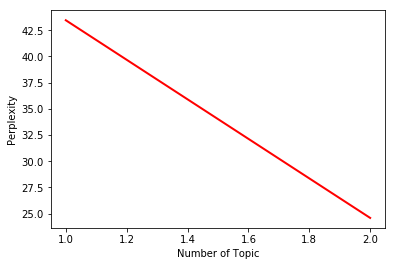

In [19]:
## 根据perplexity估计LDA的主题数：num_topic
testset000 = []
a = range(1,3,1) ## 主题个数: a取1-11即可，大于10取11就out-of-bounds了
p = []
i = 1
import collections ## 解决Keyerrors报错问题
import matplotlib.pyplot as plt
def graph_draw(topic, perplexity):
    x = topic
    y = perplexity
    plt.plot(x, y, color = "red", linewidth = 2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()
for num_topics in a: ##range(1,2,1)即为1
    corpora.MmCorpus.serialize("corpus000.mm", corpus000) ## 必须要两句话都放进去，否则不成立
    mm000 = corpora.MmCorpus("corpus000.mm")
    testset000 = [] 
    print('num_topics:', num_topics)
    print('testset_word_num:', )
    for c in range(int(mm000.num_docs/i)):
        testset000.append(corpus000[c*i])
    prep = perplexity(lda000, testset000, dictionary000, len(dictionary000.keys()), num_topics)
    p.append(prep)
graph_draw(a, p)

In [20]:
## 推断"新"文本的主题分布， 
test_doc_vec000 = dictionary000.doc2bow(bk_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)).loc[feat])
doc_lda000111 = lda000[test_doc_vec000]   ##测试集在corpus训练集上的关于doc_topic(两个topic的)向量表示
                                          ## 或者ldaooo.get_document_topics(test_doc_vec000)
test_doc_vec222 = dictionary000.doc2bow(dxy_df_1.大蒜油软胶囊.apply(lambda s: seg_depart(s)).loc[feat2])
doc_lda000222 = lda000[test_doc_vec222]

#doc_lda000 = lda000.get_document_topics(corpus000)
doc_lda000 = [doc_lda000111, doc_lda000222]  ## 0:百科 1：丁香园
doc_lda000[1]

[(0, 0.15761951752229009), (1, 0.84238048247770991)]

In [21]:
## 计算KL散度
import scipy.stats
print(doc_lda000111)
lda_topic_keys000 = []
lda_topic_prob000 = []
lda_topic_keys111 = []
lda_topic_prob111 = []
createDICT = locals()
for i in range(len(doc_lda000)):
    for key, prob in dict(lda000.show_topic(0)).items():
        lda_topic_keys000.append(key)
        lda_topic_prob000.append(prob * doc_lda000[i][0][1])
        createDICT['lda_word_prob'+str(i)*3] =  dict(zip(lda_topic_keys000, lda_topic_prob000))
    for key, prob in dict(lda000.show_topic(1)).items():
        lda_topic_keys111.append(key)
        lda_topic_prob111.append(prob * doc_lda000[i][1][1])
        if(key in lda_topic_keys000):
            createDICT['lda_word_prob'+str(i)*3][key] += prob
        else:
            createDICT['lda_word_prob'+str(i)*3][key] = prob   

def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
p0 = list(lda_word_prob000.values())  ## 百度词条
q0 = list(lda_word_prob111.values())  ## 丁香园词条
print('KL ( 百度百科词条|| 丁香园词条   ):', KL_divergence(p0, q0))  
print('KL ( 丁香园词条 ||  百度百科词条 ):', KL_divergence(q0, p0))

[(0, 0.80903723449613563), (1, 0.19096276550386443)]
KL ( 百度百科词条|| 丁香园词条   ): 0.191078950857
KL ( 丁香园词条 ||  百度百科词条 ): 0.152356692575


In [ ]:
import scipy.stats
def KL_divergence(p,q):
    return scipy.stats.entropy(p, q)
for i in range(len(doc_lda)):
    for j in range(i+1,len(doc_lda)):
        print("document %d and document %d KL divergence:"%(i,j), KL_divergence(format_prob_list[i],format_prob_list[j]))
    print('\n')

In [524]:
for i in doc_lda000:
    print(i)

[(0, 0.66981093878485798), (1, 0.33018906121514202)]
[(0, 0.33828363329681793), (1, 0.66171636670318212)]


In [527]:
doc_lda000222

[(0, 0.6801075763366059), (1, 0.31989242366339421)]

In [525]:
lda000.show_topic(1)

[('儿童', 0.019221966721956727),
 ('请', 0.018557097989333485),
 ('就诊', 0.018052928184235907),
 ('慎用', 0.017823549912619748),
 ('地方', 0.015791090697825284),
 ('放在', 0.015714107864794911),
 ('妇女', 0.015700746041147906),
 ('出现', 0.015689359824116084),
 ('12', 0.015682844043646151),
 ('时', 0.015673109056856344)]

In [485]:

#--------------仅参考代码---------------#

from gensim.models.ldamodel import LdaModel
lda_baike = LdaModel(corpus_baike, num_topics = len(words))
doc_lda_baike = lda_baike[corpus_baike] ## 推断新文本的主题分布

print("百度百科该种药品%d种属性分别的主题分布:\n"%(len(doc_lda_baike)))
for i in range(len(doc_lda_baike)):
    print("分布%d："%i,doc_lda_baike[i],"\n") 
    
## 调整文章-主题概率格式
dict_keys_baike = []
for i in doc_lda_baike:
    dict_keys_baike.extend(list(dict(i).keys()))
dict_keys_baike = set(dict_keys_baike)  ## 获得出现的所有keys
format_prob_list_baike = []
for j in range(len(doc_lda_baike)):
    convert_probs = map(lambda x: dict(doc_lda_baike[j]).setdefault(x, 0), dict_keys_baike)
    prob_list_baike = []
    for i in convert_probs:
        print(i)
        prob_list_baike.append(i)
    print("document %d topic probability:"%j,prob_list_baike)
    print('\n')
    format_prob_list_baike.append(prob_list_baike)
print(format_prob_list_baike)

百度百科该种药品7种属性分别的主题分布:

分布0： [(0, 0.020415433438940075), (1, 0.020408260795731669), (2, 0.020408268323519323), (3, 0.020408305271354798), (4, 0.020408208056973222), (5, 0.020412738638018062), (6, 0.87753878547546282)] 

分布1： [(4, 0.96703227514208634)] 

分布2： [(0, 0.98856116765821112)] 

分布3： [(1, 0.95483623799644968)] 

分布4： [(0, 0.71427200058141016), (1, 0.047619628853169151), (2, 0.047619676004915491), (3, 0.047619895745179198), (4, 0.047619314917609297), (5, 0.047629512828662755), (6, 0.047619971069053989)] 

分布5： [(0, 0.014303959387890901), (1, 0.014285798101495254), (2, 0.014285804603385641), (3, 0.01428583634576806), (4, 0.014285752762300718), (5, 0.9142662451213418), (6, 0.014286603677817663)] 

分布6： [(0, 0.023810786834757111), (1, 0.023813071281823604), (2, 0.85713593677162436), (3, 0.023809664816006399), (4, 0.023811365825811798), (5, 0.023809565967327685), (6, 0.023809608502649147)] 

0.0204154435442
0.0204082607969
0.0204082683246
0.0204083052716
0.0204082080572
0.020412740917

In [514]:
doc_lda000222

[(0, 0.48795929112185216), (1, 0.51204070887814779)]

In [435]:
testset0002 = corpus000  ## 单句话对比，选择后一句作为testset000
perplexity(lda000, testset0002, dictionary000, len(dictionary000.keys()), num_topics)

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 26.097761353685243 



26.097761353685243

In [307]:
lda000.get_document_topics(testset000)

[(0, 0.19082810694909977), (1, 0.8091718930509002)]

In [392]:
testset000

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1)]]

In [340]:
for i in dictionary000.values():
    print(i)

定期
慎用
药师
11
妇女
第一次
酒及
应去
后
慢性病
忌
就诊
医生
儿童
放在
时
应
适应
哺乳期
地方
过敏
辅助
油腻
10
治疗
体质
下
周
眼部
仅为
医师
高血压
无
肝病
指导
药品
发生
禁用
年老体弱
期间
使用
肾病
12
改变
心脏病
医院
严重者
孕妇
性状
症状
禁止
高脂血症
食物
疾
请
服用
出现
前应
前
患者
检查
烟
辛辣
缓解
接触
糖尿病
本品
服药
过敏者
正在
咨询
确诊


In [334]:
pprint.pprint(lda000.show_topics(1))

[(0,
  '0.020*"慎用" + 0.020*"就诊" + 0.020*"请" + 0.020*"儿童" + 0.016*"无" + 0.016*"药师" + '
  '0.016*"孕妇" + 0.016*"发生" + 0.016*"禁止" + 0.016*"疾"')]


In [333]:
lda000.get_document_topics(test_doc_vec000)   ## 一篇文章两个topic分别的概率
lda000 = models.LdaModel(corpus_tfidf000, num_topics, id2word = dictionary,
                     alpha = "auto", eta = "auto", minimum_probability = 0.001)
doc_topic000 = [doc_t for doc_t in lda000[corpus_tfidf000]]
print("Document-Topic:\n")
pprint.pprint(doc_topic000)  ## print一下所有两篇文档积累的所有topics
for topic_id in range(num_topics):
    print("Topic", topic_id)
    pprint.pprint(lda000.show_topic(topic_id))
lda000.get_document_topics(test_doc_vec000)

Document-Topic:

[[(0, 0.57367511848583741), (1, 0.42632488151416265)],
 [(0, 0.89871910272130984), (1, 0.10128089727869016)]]
Topic 0
[('慎用', 0.019989405794510372),
 ('就诊', 0.019805471423246054),
 ('请', 0.019712650568388477),
 ('儿童', 0.01951617443402966),
 ('无', 0.015873416261703254),
 ('药师', 0.015863689327084998),
 ('孕妇', 0.01582053586648114),
 ('发生', 0.015803221275503865),
 ('禁止', 0.015802961544025794),
 ('疾', 0.015783520332626356)]
Topic 1
[('儿童', 0.016687929650272788),
 ('请', 0.016378328895401324),
 ('就诊', 0.016227573535444521),
 ('慎用', 0.015919569374697913),
 ('过敏者', 0.015067366317462803),
 ('11', 0.014995311650202854),
 ('出现', 0.014985020923332393),
 ('性状', 0.014978607340912501),
 ('12', 0.014961476433492504),
 ('前', 0.014943649852895724)]


[(0, 0.95624500707903204), (1, 0.043754992920967947)]

In [252]:
## 单条属性--规范化一下主题向量
from gensim.models.ldamodel import LdaModel
lda000 = LdaModel(corpus000, num_topics = len(testcorpus000))
doc_lda000 = lda000[test_doc_vec000] ## 推断"新"文本的主题分布!!!!!!

## 调整文章-主题概率格式
dict_keys = []
for i in doc_lda000:
    dict_keys.extend(list(dict(i).keys()))
dict_keys = set(dict_keys)  ## 获得出现的所有keys
format_prob_list000 = []
for j in range(len(doc_lda000)):
    convert_probs = map(lambda x: dict(doc_lda000[j]).setdefault(x, 0), dict_keys)
    prob_list000 = []
    for i in convert_probs:
        print(i)
        prob_list000.append(i)
    print("document %d topic probability:"%j,prob_list000)
    print('\n')
    format_prob_list000.append(prob_list000)
print(format_prob_list000)

TypeError: cannot convert dictionary update sequence element #0 to a sequence

抽样为1时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 91.25611362117421 



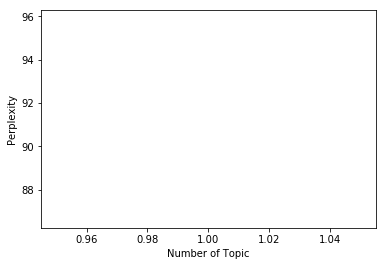

抽样为2时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 122.1791358367982 



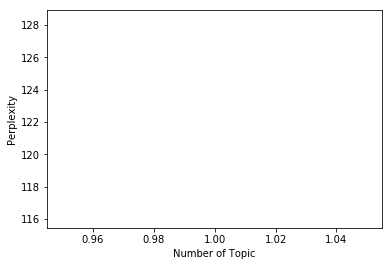

In [239]:
## 单个词条KL散度实验
import collections ## 解决Keyerrors报错问题
import matplotlib.pyplot as plt
def graph_draw(topic, perplexity):
    x = topic
    y = perplexity
    plt.plot(x, y, color = "red", linewidth = 2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()
for i in range(1,3,1):
    print("抽样为"+str(i)+"时的perplexity")
    testset = []
    a = range(1,2,1) ## 主题个数: a取1-11即可，大于10取11就out-of-bounds了
    p = []
    for num_topics in a:
        corpora.MmCorpus.serialize("corpus.mm", corpus000)
        mm = corpora.MmCorpus("corpus.mm")
        testset = [] 
        for c in range(int(mm.num_docs/i)):
            testset.append(corpus[c*i])  ## 随机选取testset
        prep = perplexity(lda000, testset, dictionary, len(dictionary.keys()), num_topics)
        p.append(prep)
    graph_draw(a, p)

In [ ]:
#=============百度百科文本==============#

In [168]:
import pprint
## 试一下单条放入
words = BAIKE_CUT_ALL_保健品.复方丁香开胃贴.dropna(axis=0, how='all', inplace = False)
dictionary = corpora.Dictionary(words)
V = len(dictionary)
corpus_baike = [dictionary.doc2bow(text) for text in words]
corpus_baike_tfidf = models.TfidfModel(corpus_baike)[corpus_baike]

## LDA模型
print("\n LDA Model:")
num_topics = len(words)
lda_baike = models.LdaModel(corpus_baike_tfidf, num_topics, id2word = dictionary,
                     alpha = "auto", eta = "auto", minimum_probability = 0.001)
doc_topic_baike = [doc_t for doc_t in lda[corpus_baike_tfidf]]
print("Document-Topic:\n")
pprint.pprint(doc_topic_baike)
for topic_id in range(num_topics):
    print("Topic", topic_id)
    pprint.pprint(lda_baike.show_topic(topic_id))
similarity = similarities.MatrixSimilarity(lda_baike[corpus_baike_tfidf])
print("Similarity:")
pprint.pprint(list(similarity))## 注意：LDA和LSI模型算出来的相似度可能会不一样，甚至会有正负的差异。观察可见，对角线基本为1.


 LDA Model:
Document-Topic:

[[(0, 0.029464391006150649),
  (1, 0.73481888956343111),
  (2, 0.029464391166651789),
  (3, 0.029464393170252137),
  (4, 0.029464391647899279),
  (5, 0.029464390815997995),
  (6, 0.029464391647886178),
  (7, 0.029465977854232456),
  (8, 0.029464391479610587),
  (9, 0.029464391647887909)],
 [(0, 0.45617710290452884),
  (1, 0.1185501059231881),
  (2, 0.016702758228443467),
  (3, 0.016701441433753968),
  (4, 0.016701432692292444),
  (5, 0.016704405718838775),
  (6, 0.016701432692029568),
  (7, 0.30835845555510827),
  (8, 0.016701432159451024),
  (9, 0.016701432692365587)],
 [(0, 0.088968783523560815),
  (1, 0.026327212742523899),
  (2, 0.12588509330991576),
  (3, 0.013772195769841265),
  (4, 0.013772191051342558),
  (5, 0.22290106075289329),
  (6, 0.013772191053012292),
  (7, 0.44146075757321646),
  (8, 0.039368323166903779),
  (9, 0.013772191056789774)],
 [(0, 0.020617406661857705),
  (1, 0.020617533450822102),
  (2, 0.095584593174936491),
  (3, 0.0206174343

In [162]:
from gensim.models.ldamodel import LdaModel
lda_baike = LdaModel(corpus_baike, num_topics = len(words))
doc_lda_baike = lda_baike[corpus_baike] ## 推断新文本的主题分布

print("百度百科该种药品%d种属性分别的主题分布:\n"%(len(doc_lda_baike)))
for i in range(len(doc_lda_baike)):
    print("分布%d："%i,doc_lda_baike[i],"\n") 
    
## 调整文章-主题概率格式
dict_keys_baike = []
for i in doc_lda_baike:
    dict_keys_baike.extend(list(dict(i).keys()))
dict_keys_baike = set(dict_keys_baike)  ## 获得出现的所有keys
format_prob_list_baike = []
for j in range(len(doc_lda_baike)):
    convert_probs = map(lambda x: dict(doc_lda_baike[j]).setdefault(x, 0), dict_keys_baike)
    prob_list_baike = []
    for i in convert_probs:
        print(i)
        prob_list_baike.append(i)
    print("document %d topic probability:"%j,prob_list_baike)
    print('\n')
    format_prob_list_baike.append(prob_list_baike)
print(format_prob_list_baike)

百度百科该种药品7种属性分别的主题分布:

分布0： [(0, 0.020408226497638054), (1, 0.020417776622711215), (2, 0.87753928725024499), (3, 0.020408209287215994), (4, 0.020408282012615318), (5, 0.020409942644121073), (6, 0.02040827568545335)] 

分布1： [(3, 0.96703102490969772)] 

分布2： [(1, 0.9885641590163019)] 

分布3： [(5, 0.95487945765038384)] 

分布4： [(0, 0.047619371893914346), (1, 0.047663737233994127), (2, 0.047619500539715295), (3, 0.71422668304401682), (4, 0.047619656099459395), (5, 0.0476314288842749), (6, 0.047619622304625069)] 

分布5： [(0, 0.91423939663006271), (1, 0.0143221466614351), (2, 0.014285787797294058), (3, 0.014285752611272354), (4, 0.014285813040795231), (5, 0.014295295320027657), (6, 0.014285807939112818)] 

分布6： [(0, 0.85712860782319356), (1, 0.02380956443222922), (2, 0.023809669166454817), (3, 0.023809599770388299), (4, 0.023809719469847775), (5, 0.023823129979600243), (6, 0.023809709358286021)] 

0.020408226496
0.0204177212304
0.877539274386
0.020408209286
0.0204082820117
0.020409942635
0.02040

In [ ]:
#==========丁香园数据读入============#

In [158]:
import pprint
## 试一下单条放入
words_pair = DXY_CUT_ALL_保健品.复方丁香开胃贴.dropna(axis=0, how='all', inplace = False)
dictionary = corpora.Dictionary(words_pair)
V = len(dictionary)
corpus_dxy = [dictionary.doc2bow(text) for text in words_pair]
corpus_dxy_tfidf = models.TfidfModel(corpus)[corpus]

## LDA模型
print("\n LDA Model:")
num_topics = len(words) ## 根据百科的topic数来
lda_dxy = models.LdaModel(corpus_dxy_tfidf, num_topics, id2word = dictionary,
                     alpha = "auto", eta = "auto", minimum_probability = 0.001)
doc_topic_dxy = [doc_t for doc_t in lda_dxy[corpus_dxy_tfidf]]
print("Document-Topic:\n")
pprint.pprint(doc_topic_dxy)
for topic_id in range(num_topics):
    print("Topic", topic_id)
    pprint.pprint(lda_dxy.show_topic(topic_id))
similarity = similarities.MatrixSimilarity(lda_dxy[corpus_dxy_tfidf])
print("Similarity:")
pprint.pprint(list(similarity))## 注意：LDA和LSI模型算出来的相似度可能会不一样，甚至会有正负的差异。观察可见，对角线基本为1.


 LDA Model:
Document-Topic:

[[(0, 0.032019444295999178),
  (1, 0.042065064051742512),
  (2, 0.03203404361333468),
  (3, 0.040778602643718305),
  (4, 0.037424358504487186),
  (5, 0.042021491297398274),
  (6, 0.77365699559331991)],
 [(0, 0.023545027643347139),
  (1, 0.030932273408514035),
  (2, 0.023555763251672541),
  (3, 0.02998628226687761),
  (4, 0.027516881752530985),
  (5, 0.030900222200225584),
  (6, 0.83356354947683209)],
 [(0, 0.040276400646551497),
  (1, 0.052912110911265221),
  (2, 0.040294764453990904),
  (3, 0.70825903644052401),
  (4, 0.047070392361526492),
  (5, 0.052857315098901035),
  (6, 0.058329980087240815)],
 [(0, 0.01611629170844181),
  (1, 0.021220586965711781),
  (2, 0.016123640858682665),
  (3, 0.020526260151405181),
  (4, 0.88143941355123623),
  (5, 0.021151842274509527),
  (6, 0.023421964490012707)],
 [(0, 0.036560654955740922),
  (1, 0.048030802170723898),
  (2, 0.036577324596291039),
  (3, 0.046561894127768066),
  (4, 0.042727907828733522),
  (5, 0.73659240

In [160]:
from gensim.models.ldamodel import LdaModel
lda_dxy = LdaModel(corpus_dxy, num_topics = 10)
doc_lda_dxy = lda[corpus_dxy] ## 推断新文本的主题分布

print("丁香园该种药品%d种属性分别的主题分布:\n"%(len(doc_lda_dxy)))
for i in range(len(doc_lda_dxy)):
    print("分布%d："%i,doc_lda_dxy[i],"\n") 
    
## 调整文章-主题概率格式
dict_keys = []
for i in doc_lda_dxy:
    dict_keys.extend(list(dict(i).keys()))
dict_keys = set(dict_keys)  ## 获得出现的所有keys
format_prob_list_dxy = []
for j in range(len(doc_lda_dxy)):
    convert_probs = map(lambda x: dict(doc_lda[j]).setdefault(x, 0), dict_keys)
    prob_list_dxy = []
    for i in convert_probs:
        print(i)
        prob_list_dxy.append(i)
    print("document %d topic probability:"%j,prob_list_dxy)
    print('\n')
    format_prob_list_dxy.append(prob_list_dxy)
print(format_prob_list_dxy)

丁香园该种药品10种属性分别的主题分布:

分布0： [(0, 0.014285714452344734), (1, 0.87142748860085706), (2, 0.014285714521758428), (3, 0.014285715594577992), (4, 0.014285714729893952), (5, 0.014285714370101055), (6, 0.014285714729893571), (7, 0.014286793613570145), (8, 0.014285714657113147), (9, 0.014285714729889981)] 

分布1： [(0, 0.93571428409953517)] 

分布2： [(0, 0.025000000330473893), (1, 0.77499999461614644), (2, 0.02500000046886924), (3, 0.025000000783287783), (4, 0.025000000898464284), (5, 0.025000000166483082), (6, 0.0250000008941684), (7, 0.025000000188396692), (8, 0.025000000749577329), (9, 0.025000000904132853)] 

分布3： [(7, 0.97857105789722021)] 

分布4： [(0, 0.81999999488488129), (1, 0.020000000364383787), (2, 0.02000000043594798), (3, 0.020000000750209232), (4, 0.020000000855248227), (5, 0.020000000153090933), (6, 0.020000000844649424), (7, 0.020000000173596273), (8, 0.020000000692224136), (9, 0.02000000084576847)] 

分布5： [(5, 0.95499985791086495)] 

分布6： [(0, 0.033333333583506826), (1, 0.03333333363

In [134]:
hda = models.HdpModel(corpus_tfidf, id2word = dictionary)
topic_result = [a for a in hda[corpus_tfidf]]
print('\n\nUSE WITH CARE--\nHDA Model:')
pprint.pprint(topic_result)
print("HDA Topics")
print(hda.print_topics(num_topics = len(words), num_words = 5))

for topic_id in range(num_topics):
    print("Topic", topic_id)
    pprint.pprint(lda.show_topic(topic_id))
similarity = similarities.MatrixSimilarity(hda[corpus_tfidf])
print("Similarity:")
pprint.pprint(list(similarity))  ## 有个报错（warning）：16个documents,9个features特征



USE WITH CARE--
HDA Model:
[[(0, 0.089267545485299263),
  (1, 0.75846858916385507),
  (2, 0.043671449314707352),
  (3, 0.030856121600565192),
  (4, 0.022091993565313044),
  (5, 0.015813159708748168),
  (6, 0.011379060166194719)],
 [(0, 0.53433284032044392),
  (1, 0.37918579642557348),
  (2, 0.024923393346558687),
  (3, 0.017494120762324532),
  (4, 0.012522745318662196)],
 [(0, 0.36048918697049465),
  (1, 0.029876700939887414),
  (2, 0.55886907482233528),
  (3, 0.014429566658725086),
  (4, 0.01032634139653836)],
 [(0, 0.34713595228329786),
  (1, 0.54627041474075066),
  (2, 0.030592900598033813),
  (3, 0.021605056479458883),
  (4, 0.015459146120519435),
  (5, 0.011065097964601579)],
 [(0, 0.11898745423433639),
  (1, 0.66412667281870408),
  (2, 0.062144116208512505),
  (3, 0.043987208956563856),
  (4, 0.031475772224250333),
  (5, 0.022529673684562119),
  (6, 0.016212225554374984),
  (7, 0.011708079997178279)],
 [(0, 0.79359825893451375),
  (1, 0.060171217365804705),
  (2, 0.042144859526

In [111]:
## LDA 计算perplexity困惑度，确定主题个数
import math
def perplexity(ldamodel, testset, dictionary, size_dictionary, num_topics):
    print('the info of this ldamodel: ')
    print('num of topics: %s' % num_topics)
    prep = 0.0
    prob_doc_sum = 0.0
    topic_word_list = [] 
    for topic_id in range(num_topics):
        topic_word = ldamodel.show_topic(topic_id, size_dictionary)
        dic = {}
        for word, probability in topic_word:
            dic[word] = probability
        topic_word_list.append(dic)  
    doc_topics_ist = []  
    for doc in testset:
        doc_topics_ist.append(ldamodel.get_document_topics(doc, minimum_probability=0))
    testset_word_num = 0
    for i in range(len(testset)):
        prob_doc = 0.0  # the probability of the doc
        doc = testset[i]
        doc_word_num = 0  
        for word_id, num in dict(doc).items():
            prob_word = 0.0  
            doc_word_num += num
            word = dictionary[word_id]
            for topic_id in range(num_topics):
                # cal p(w) : p(w) = sumz(p(z)*p(w|z))
                prob_topic = doc_topics_ist[i][topic_id][1]   ## 第i篇文章，第topic_id个主题的概率  
                prob_topic_word = topic_word_list[topic_id][str(list(dictionary.values()).index(word))]  ## 第topic_id个主题下，检索为”word“的词的概率
                prob_word += prob_topic * prob_topic_word  ## 一共相加词总数次
            prob_doc += math.log(prob_word)  # p(d) = sum(log(p(w)))
        prob_doc_sum += prob_doc
        testset_word_num += doc_word_num
    prep = math.exp(-prob_doc_sum / testset_word_num)  # perplexity = exp(-sum(p(d)/sum(Nd))
    print("模型困惑度的值为 : %s" % prep,'\n')
    return prep

抽样为1时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 11405.795566143059 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 4180.896116251577 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 2283.8111642695744 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 1730.2082308379772 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 1431.3498114626568 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 399.9733140207838 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 374.2918197371976 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 129.03407826051492 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 125.20886645173506 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 123.689612274867 



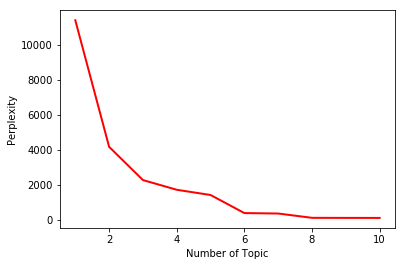

抽样为2时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 5242.906535610771 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 661.5491040776383 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 153.26297111156697 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 145.40653331375864 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 139.32995817381047 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 135.73513165064165 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 130.84347758264502 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 125.28226190035178 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 111.8096723022971 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 109.20808192623615 



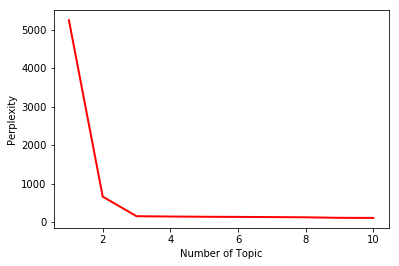

抽样为3时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 26613.782232048274 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 6784.78967483205 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 4675.8557402998285 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 3301.6608960652397 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 2617.755789574713 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 2180.483508562429 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 1888.922205458139 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 134.09733111620622 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 126.64351318075879 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 125.46125640934989 



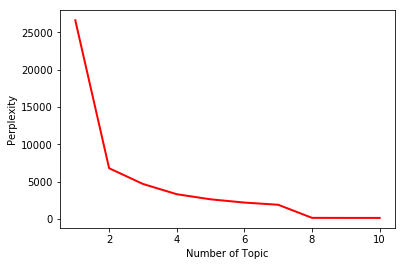

抽样为4时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 2375.3406315549055 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 158.5475815842502 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 155.7244068205381 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 150.73599902714113 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 146.1899097037915 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 142.15719512064507 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 138.18370338024832 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 133.69156002546964 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 130.77061554008074 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 127.48717209698313 



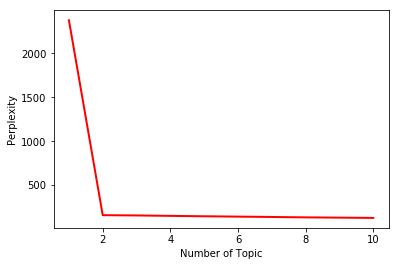

抽样为5时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 14834.82208109575 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 2561.9671136572088 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 1808.8060227428616 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 1344.3424435907127 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 1091.141040951543 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 80.99071955770256 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 80.0504754096154 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 79.28432855146112 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 78.53660452147088 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 77.67501426654177 



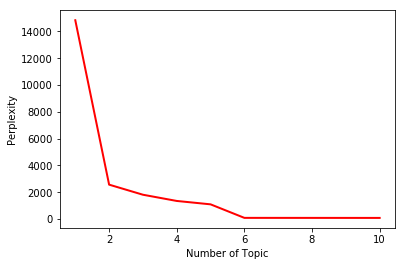

抽样为6时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 13001.741017346365 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 145.93083396380283 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 144.00892507436436 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 140.5525146049069 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 137.32997809336186 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 133.97268060882197 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 131.07940546075048 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 128.64056919156855 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 126.38914090664885 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 123.82620919966213 



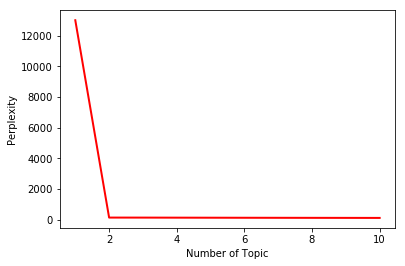

抽样为7时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 13001.741017365419 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 145.930861724376 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 144.00891770158685 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 140.55252511400917 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 137.32996410053173 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 133.97269202614075 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 131.0794273055048 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 128.64056743345688 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 126.38913412780332 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 123.82621031297951 



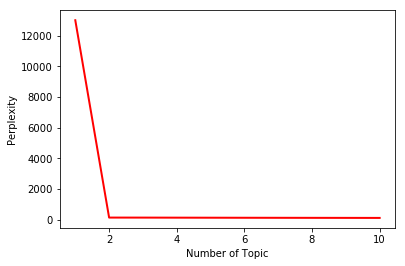

抽样为8时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 13001.741017306364 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 145.93079970196854 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 144.00894684777887 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 140.55256024349416 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 137.32999175131715 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 133.97267874249968 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 131.07944522211668 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 128.64056709180105 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 126.38914170084733 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 123.82620075536248 



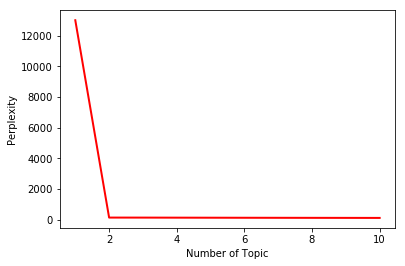

抽样为9时的perplexity
the info of this ldamodel: 
num of topics: 1
模型困惑度的值为 : 13001.741017368005 

the info of this ldamodel: 
num of topics: 2
模型困惑度的值为 : 145.9308211592 

the info of this ldamodel: 
num of topics: 3
模型困惑度的值为 : 144.00892378352293 

the info of this ldamodel: 
num of topics: 4
模型困惑度的值为 : 140.55251371251182 

the info of this ldamodel: 
num of topics: 5
模型困惑度的值为 : 137.32998384156966 

the info of this ldamodel: 
num of topics: 6
模型困惑度的值为 : 133.97267404646357 

the info of this ldamodel: 
num of topics: 7
模型困惑度的值为 : 131.0794000022939 

the info of this ldamodel: 
num of topics: 8
模型困惑度的值为 : 128.64056722342346 

the info of this ldamodel: 
num of topics: 9
模型困惑度的值为 : 126.38914298767503 

the info of this ldamodel: 
num of topics: 10
模型困惑度的值为 : 123.82620090268223 



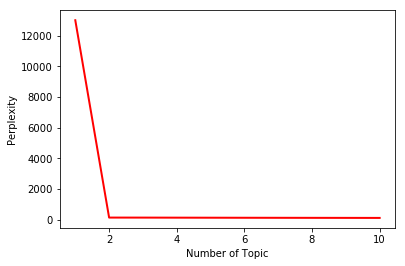

In [167]:
import collections ## 解决Keyerrors报错问题
import matplotlib.pyplot as plt
def graph_draw(topic, perplexity):
    x = topic
    y = perplexity
    plt.plot(x, y, color = "red", linewidth = 2)
    plt.xlabel("Number of Topic")
    plt.ylabel("Perplexity")
    plt.show()
for i in range(1,10,1):
    print("抽样为"+str(i)+"时的perplexity")
    testset = []
    a = range(1,11,1) ## 主题个数: a取1-11即可，大于10取11就out-of-bounds了
    p = []
    for num_topics in a:
        corpora.MmCorpus.serialize("corpus.mm", corpus_dxy)
        mm = corpora.MmCorpus("corpus.mm")
        testset = [] 
        for c in range(int(mm.num_docs/i)):
            testset.append(corpus[c*i])  ## 随机选取testset
        prep = perplexity(lda, testset, dictionary, len(dictionary.keys()), num_topics)
        p.append(prep)
    graph_draw(a, p)

In [9]:
bk_df_0

,复方丁香开胃贴
功能主治,健脾开胃，燥湿和中，调气导滞。适用于由脾胃虚弱或寒湿困脾所致的食少纳呆，脘腹胀满，大便溏泄，...
规格,每贴（药丸）重1.2克
用法用量,外用，置药丸于胶布护圈中，药芯对准脐部（神阙穴）贴12小时以上，一日1贴，3贴为一疗程。
不良反应,少数病人出现局部皮肤瘙痒。
禁忌,孕妇禁用。
注意事项,1.本品为外用贴敷剂，禁止内服，皮肤破损处忌用。2.贴敷部位如有明显灼热感或瘙痒、局部红肿等...
药物相互作用,如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。


In [92]:
rows = csv.reader(csvfile)
name = []
feature = []
for row in rows:
    name.append(row[0])
    feature.append(row[1])
createDF["bk_df_" + str(i)] = pd.DataFrame(feature, index = name, columns = [drugkeys[i]]).drop(name[0]) 

            

TypeError: argument 1 must be an iterator

In [103]:
i=1
root = '.\百度词条爬虫\保健食品\保健品'
file_ob_list, drugkeys = DRUG_NAME_EXTRACT(root)
bk_lst = []
with open(file_ob_list[i], encoding='UTF-8') as csvfile:
    rows = csv.reader(csvfile)
    name = []
    feature = []
    for row in rows:
        name.append(row[0])
        feature.append(row[1])
    createDF["bk_df_" + str(i)] = pd.DataFrame(feature, index = name, columns = [drugkeys[i]]).drop(name[0])    
#bk_df = pd.DataFrame(bk_lst[1:], columns = [drugkeys[i]])
#bk_df
#createDF["bk_df_" + str(i)] = pd.DataFrame(list(bk_df[drugkeys[i]]), index = bk_df[''], columns = [drugkeys[i]])
#createDF["bk_cut_all_" + str(i)] = bk_df[drugkeys[i]] .apply(lambda s: seg_depart(s))

'.\\百度词条爬虫\\保健食品\\保健品\\1.txt'

In [82]:
createDF["bk"+"_df"][drugkeys[2]].apply(lambda s: seg_depart(s))

功能主治           [健脾, 化湿, 祛痰, 适用, 痰, 浊, 阻遏, 所致, 高脂血症, 辅助, 治疗]
规格                                         [每粒, 装, 0.21, 克]
用法用量                         [口服, 一次, 粒, 一日, 次, 饭后, 佐餐, 服用]
注意事项      [忌, 烟, 酒及, 辛辣, 油腻, 食物, 本品, 仅为, 高脂血症, 辅助, 治疗, 药...
药物相互作用              [药物, 使用, 发生, 药物, 相互作用, 详情请, 咨询, 医师, 药师]
Name: 妇科止痒胶囊, dtype: object

In [31]:
bk_lst = []
with open(file_ob_list[1], encoding='UTF-8') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        #print('\t'.join(row))
        bk_lst.append(row)
bk_df = pd.DataFrame(bk_lst[1:], columns = bk_lst[0])
bk_cut_all = bk_df['内容'] .apply(lambda s: seg_depart(s))
print(bk_cut_all)
bk_df

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\lenovo\AppData\Local\Temp\jieba.cache
Loading model cost 1.052 seconds.
Prefix dict has been built succesfully.


0    [健脾开胃, 燥湿, 中, 调气, 导滞, 适用, 脾胃, 虚弱, 寒湿, 困脾, 所致, ...
1                                  [每贴, 药丸, 重, 1.2, 克]
2    [外用, 置, 药丸, 胶布, 护圈, 中, 药芯, 对准, 脐部, 神阙穴, 贴, 12,...
3                             [少数, 病人, 出现, 局部, 皮肤, 瘙痒]
4                                             [孕妇, 禁用]
5    [本品, 外用, 贴, 敷剂, 禁止, 内服, 皮肤, 破损处, 忌用, 贴, 敷, 部位,...
6              [药物, 使用, 发生, 药物, 相互作用, 详情请, 咨询, 医师, 药师]
Name: 内容, dtype: object


,﻿,内容
0,功能主治,健脾开胃，燥湿和中，调气导滞。适用于由脾胃虚弱或寒湿困脾所致的食少纳呆，脘腹胀满，大便溏泄，...
1,规格,每贴（药丸）重1.2克
2,用法用量,外用，置药丸于胶布护圈中，药芯对准脐部（神阙穴）贴12小时以上，一日1贴，3贴为一疗程。
3,不良反应,少数病人出现局部皮肤瘙痒。
4,禁忌,孕妇禁用。
5,注意事项,1.本品为外用贴敷剂，禁止内服，皮肤破损处忌用。2.贴敷部位如有明显灼热感或瘙痒、局部红肿等...
6,药物相互作用,如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。


In [182]:
## 读取百度词条数据
import os
import csv
import linecache ## 读取指定行函数linecache.getline(file_ob, line_num)所在包
from pandas.core.frame import DataFrame
root = '.\百度词条爬虫\保健食品\保健品'
file_names = os.listdir(root)
file_ob_list = []
for file_name in file_names:
    fileob = root + '\\' + file_name
    file_ob_list.append(fileob)
    
## 读取药品名称
for file_name in file_names:
    fileob = root + '\\' + file_name
    file_ob_list.append(fileob)
drugname = map(lambda x: re.findall(r"\\.*\\(.*).txt",x), file_ob_list)
drugkeys = []
for i in drugname:
    drugkeys.extend(i)
print(file_ob_list)
print('\n')
print(drugkeys)


print(file_ob_list[1:])
print('\n')

bk_lst = []
with open(file_ob_list[1], encoding='UTF-8') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        #print('\t'.join(row))
        bk_lst.append(row)
bk_df = pd.DataFrame(bk_lst[1:], columns = bk_lst[0])
bk_cut_all = bk_df['内容'] .apply(lambda s: seg_depart(s))
print(bk_cut_all)
bk_df

['.\\百度词条爬虫\\保健食品\\保健品\\1.txt', '.\\百度词条爬虫\\保健食品\\保健品\\复方丁香开胃贴.csv', '.\\百度词条爬虫\\保健食品\\保健品\\大蒜油软胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\妇科止痒胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\祛白酊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\维生素C咀嚼片.csv', '.\\百度词条爬虫\\保健食品\\保健品\\蚝贝钙片(咀嚼片).csv', '.\\百度词条爬虫\\保健食品\\保健品\\1.txt', '.\\百度词条爬虫\\保健食品\\保健品\\复方丁香开胃贴.csv', '.\\百度词条爬虫\\保健食品\\保健品\\大蒜油软胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\妇科止痒胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\祛白酊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\维生素C咀嚼片.csv', '.\\百度词条爬虫\\保健食品\\保健品\\蚝贝钙片(咀嚼片).csv']


['1', '1']
['.\\百度词条爬虫\\保健食品\\保健品\\复方丁香开胃贴.csv', '.\\百度词条爬虫\\保健食品\\保健品\\大蒜油软胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\妇科止痒胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\祛白酊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\维生素C咀嚼片.csv', '.\\百度词条爬虫\\保健食品\\保健品\\蚝贝钙片(咀嚼片).csv', '.\\百度词条爬虫\\保健食品\\保健品\\1.txt', '.\\百度词条爬虫\\保健食品\\保健品\\复方丁香开胃贴.csv', '.\\百度词条爬虫\\保健食品\\保健品\\大蒜油软胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\妇科止痒胶囊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\祛白酊.csv', '.\\百度词条爬虫\\保健食品\\保健品\\维生素C咀嚼片.csv', '.\\百度词条爬虫\\保健食品\\保健品\\蚝贝钙片(咀嚼片).csv']


0    [健脾开胃, 燥湿, 中,

,﻿,内容
0,功能主治,健脾开胃，燥湿和中，调气导滞。适用于由脾胃虚弱或寒湿困脾所致的食少纳呆，脘腹胀满，大便溏泄，...
1,规格,每贴（药丸）重1.2克
2,用法用量,外用，置药丸于胶布护圈中，药芯对准脐部（神阙穴）贴12小时以上，一日1贴，3贴为一疗程。
3,不良反应,少数病人出现局部皮肤瘙痒。
4,禁忌,孕妇禁用。
5,注意事项,1.本品为外用贴敷剂，禁止内服，皮肤破损处忌用。2.贴敷部位如有明显灼热感或瘙痒、局部红肿等...
6,药物相互作用,如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。


In [9]:
import re
re.findall(r"\\.*\\(.*).txt",file_ob_list2[0])[0]
l = []
l.append('成分')
l.extend([1,'中餐'])
l.extend('')
l.append(['麝香'])
print(l)
if(':' not in 'chengfen:'):
    print(1)
else:
    print(2)
k = True
print(not k)
print([1,2,3,4][-1])
print(pd.DataFrame([[1,2,3,4],[2,3,4,5]]).stack().unstack(0))
pd.DataFrame([[1,2,3,4],[2,3,4,5]])

['成分', 1, '中餐', ['麝香']]
2
False
4
   0  1
0  1  2
1  2  3
2  3  4
3  4  5


,0,1,2,3
0,1,2,3,4
1,2,3,4,5


In [24]:
## 动态生成变量
createVar = locals()
listTemp = range(1,10)
for i,s in enumerate(listTemp):  # i:index, s: values
    createVar['a'+str(i)] = s
print(a1,a2,a3)
createVar['a'+'3']
a3
"分子式" in "分子式："
"分子式:H2O".split(":")[1]

2 3 4


4

In [121]:
pd.DataFrame(feature, index = name, columns = ['内容'])

,内容
成份:,牡蛎、蔗糖、淀粉、硬脂酸镁、甜橙油香精。 \n
适应症:,补肾壮骨。用于儿童缺钙及老年骨质疏松症的辅助治疗。 \n
用法用量:,嚼服，一次1片，一日3次。 \n
不良反应:,尚不明确。 \n
禁忌:,糖尿病患者禁服。 \n
注意事项:,忌食生冷、油腻食物。孕妇慎用，儿童应在医师指导下服用。感冒时不宜服用。高血压、心脏病、肝病、...
药物相互作用:,如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。 \n
批准文号:,国药准字B20020203 \n
是否OTC:,甲类OTC\n
生产企业:,福建省泉州恒达制药有限公司 \n


In [114]:
var = []
for i in range(len(file_ob_list2)):
    for j in createDF['df'+ str(i)][0]:
        var.append(j)
df1[0][1]
set(var)

{'不良反应:',
 '分子式',
 '分子量',
 '成份:',
 '批准文号:',
 '是否OTC:',
 '毒理研究:',
 '注意事项:',
 '生产企业:',
 '用法用量:',
 '禁忌:',
 '药物分类:',
 '药物相互作用:',
 '适应症:'}

In [90]:
import re
createDF = locals()
with open(file_ob_list2[1],encoding = 'UTF-8') as fp:
    name = []
    feature = []
    detect = False  ## 默认“内容读取开关”为关闭状态
    lines = fp.readlines()
    fp.close()
    for idx, line in enumerate(lines):
        if line.split():
            print(idx, line)                
    for line in lines:
        line = line.lstrip()
        if("分子式：" in line):
            name.append("分子式")
            feature.append(re.split(':|：',line)[1])
        if("分子量：" in line):
            name.append("分子量")
            feature.append(re.split(':|：',line)[1])           
        if(':\n' in line):
            name.append(line.strip())
            detect = True  ## 打开内容读取开关
            continue
        if(detect and len(line)):
            feature.append(line)
            detect = False ## 每读完一行有效词条，关闭"内容读取开关"
            continue
        if(not detect and len(line)):
            last = feature[-1]
            line = last + line
            feature.pop() ## 删除上一行，和本行连接后再加入
            feature.append(line)
createDF['df'+ str(1)] = pd.DataFrame([name, feature]).stack().unstack(0)
df1

0 成份:

1     大蒜油

2     大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 

3 用法用量:

5     口服。

7     一次1～2粒，一日2～3次，饭后或佐餐服用。

8 不良反应:

9     尚不明确。 

10 禁忌:

11     尚不明确。 

12 注意事项:

13     忌烟、酒及辛辣、油腻食物。本品仅为高脂血症的辅助治疗药品，应在医生确诊后使用。第一次使用本品前应咨询医生，治疗期间应定期到医院检查。有高血压、心脏病、肝病、糖尿病、肾病等慢性病严重者应在医师指导下服用... 

14 批准文号:

15     国药准字B20020858 

16 生产企业:

17     河南雪樱花制药有限公司 

18 药物分类:

19     保健品 


,0,1
0,成份:,大蒜油\n大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n
1,用法用量:,口服。\n一次1～2粒，一日2～3次，饭后或佐餐服用。\n
2,不良反应:,尚不明确。 \n
3,禁忌:,尚不明确。 \n
4,注意事项:,忌烟、酒及辛辣、油腻食物。本品仅为高脂血症的辅助治疗药品，应在医生确诊后使用。第一次使用本品...
5,批准文号:,国药准字B20020858 \n
6,生产企业:,河南雪樱花制药有限公司 \n
7,药物分类:,保健品


In [71]:
import re
createDF = locals()
with open(file_ob_list2[1],encoding = 'UTF-8') as fp:
    name = []
    feature = []
    lines = fp.readlines()
    detect = False
    fp.close()
    for idx, line in enumerate(lines):
        if line.split():
            print(idx, line)                
    for i in range(len(lines)):
        line = lines[i]
        while(len(line)):         
            if(line.endswith(':\n')):
                name.append(line.lstrip())
            if(line.startswith(' ')):
                if(':\n' in lines[i-1]):
                    feature.append(line.strip())
                else: 
                    feature.pop()
                    line = lines[i-1] + line
                    feature.append(line)
df1 = pd.DataFrame([name, feature]).stack().unstack(0)
print(df1)


0 成份:

1     大蒜油

2     大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 

3 用法用量:

5     口服。

7     一次1～2粒，一日2～3次，饭后或佐餐服用。

8 不良反应:

9     尚不明确。 

10 禁忌:

11     尚不明确。 

12 注意事项:

13     忌烟、酒及辛辣、油腻食物。本品仅为高脂血症的辅助治疗药品，应在医生确诊后使用。第一次使用本品前应咨询医生，治疗期间应定期到医院检查。有高血压、心脏病、肝病、糖尿病、肾病等慢性病严重者应在医师指导下服用... 

14 批准文号:

15     国药准字B20020858 

16 生产企业:

17     河南雪樱花制药有限公司 

18 药物分类:

19     保健品 


MemoryError: 

In [65]:
' ' == lines[1][0]
'分子式：H20'.split("：")[0]
re.split(':|：',"分子式：H20")[1]
' '=='    大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n'[0]
' '=='成份:\n'[0]
re.findall('^\s.*\n$', '    大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n')
'    大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n'.endswith('\n')

True

In [33]:
for i in range(len(file_ob_list2)):
    with open(file_ob_list2[i], encoding = 'UTF-8') as fp:
        lines = fp.readlines()
        print(lines)
    print('\n')

['成份:\n', '    丁香、苍术、白术、豆蔻、砂仁、木香、冰片，辅料为：尼泊金乙酯、薄荷油、月桂氮卓酮。 \n', '适应症:\n', '    健脾开胃，燥湿和中，调气导滞。适用于由脾胃虚弱或寒湿困脾所致的食少纳呆，脘腹胀满，大便溏泄，嗳气欲呕，腹痛肠鸣等症的治疗。 \n', '用法用量:\n', '    外用，置药丸于胶布护圈中，药芯对准肌部（神厥穴）贴12小时以上，一日1贴，3贴为一疗程。 \n', '不良反应:\n', '    少数病人出现局部皮肤瘙痒。 \n', '禁忌:\n', '    孕妇禁用。 \n', '注意事项:\n', '    本品为外用贴敷剂，禁止内服，皮肤破损处忌用。敷部位如有明显灼热感或瘙痒、局部红肿等情况，应停止用药，洗净，必要时向医师咨询。药3贴症状无缓解，应到医院诊治。儿童、年老体弱者应在医师指导下使用。本品过敏... \n', '药物相互作用:\n', '    如与其他药物同时使用可能会发生药物相互作用，详情请咨询医师或药师。 \n', '批准文号:\n', '    国药准字 B20050645 \n', '生产企业:\n', '    湛江寸草制药有限公司 \n', '药物分类:\n', '    保健品 ']


['成份:\n', '    大蒜油\n', '    大蒜。辅料为液状石蜡、明胶、甘油、羟苯乙酯。 \n', '用法用量:\n', '\n', '    口服。\n', '\n', '    一次1～2粒，一日2～3次，饭后或佐餐服用。\n', '不良反应:\n', '    尚不明确。 \n', '禁忌:\n', '    尚不明确。 \n', '注意事项:\n', '    忌烟、酒及辛辣、油腻食物。本品仅为高脂血症的辅助治疗药品，应在医生确诊后使用。第一次使用本品前应咨询医生，治疗期间应定期到医院检查。有高血压、心脏病、肝病、糖尿病、肾病等慢性病严重者应在医师指导下服用... \n', '批准文号:\n', '    国药准字B20020858 \n', '生产企业:\n', '    河南雪樱花制药有限公司 \n', '药物分类:\n', '    保健品 ']


['成份:\n', '    败酱草、白花蛇舌草、蒲公英、横经席、茜草、鸡血藤、当归、延胡索（醋炙）。 \n', '适应症

In [113]:
bk_lst = []
with open(file_ob_list2[1], encoding='UTF-8') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        #print('\t'.join(row))
        bk_lst.append(row)
bk_df = pd.DataFrame(bk_lst[1:], columns = bk_lst[0])
bk_cut_all = bk_df['内容'] .apply(lambda s: seg_depart(s))
print(bk_cut_all)
bk_df

FileNotFoundError: [Errno 2] No such file or directory: '.\\百度词条爬虫\\保健食品\\保健品\\大蒜油软胶囊.txt'

In [31]:
#bk = "丁香、苍术、白术、豆蔻、砂仁、木香、冰片，辅料为：尼泊金乙酯、薄荷油、月桂氮卓酮。 "
#encoding:utf-8
bk = pd.read_csv("复方丁香开胃贴.csv", encoding = "GBK", header = None)
bk_cut_all = bk_all.apply(lambda s: seg_depart(s))


FileNotFoundError: File b'\xb8\xb4\xb7\xbd\xb6\xa1\xcf\xe3\xbf\xaa\xce\xb8\xcc\xf9.csv' does not exist